Data loaded successfully!
Number of peptides: 480


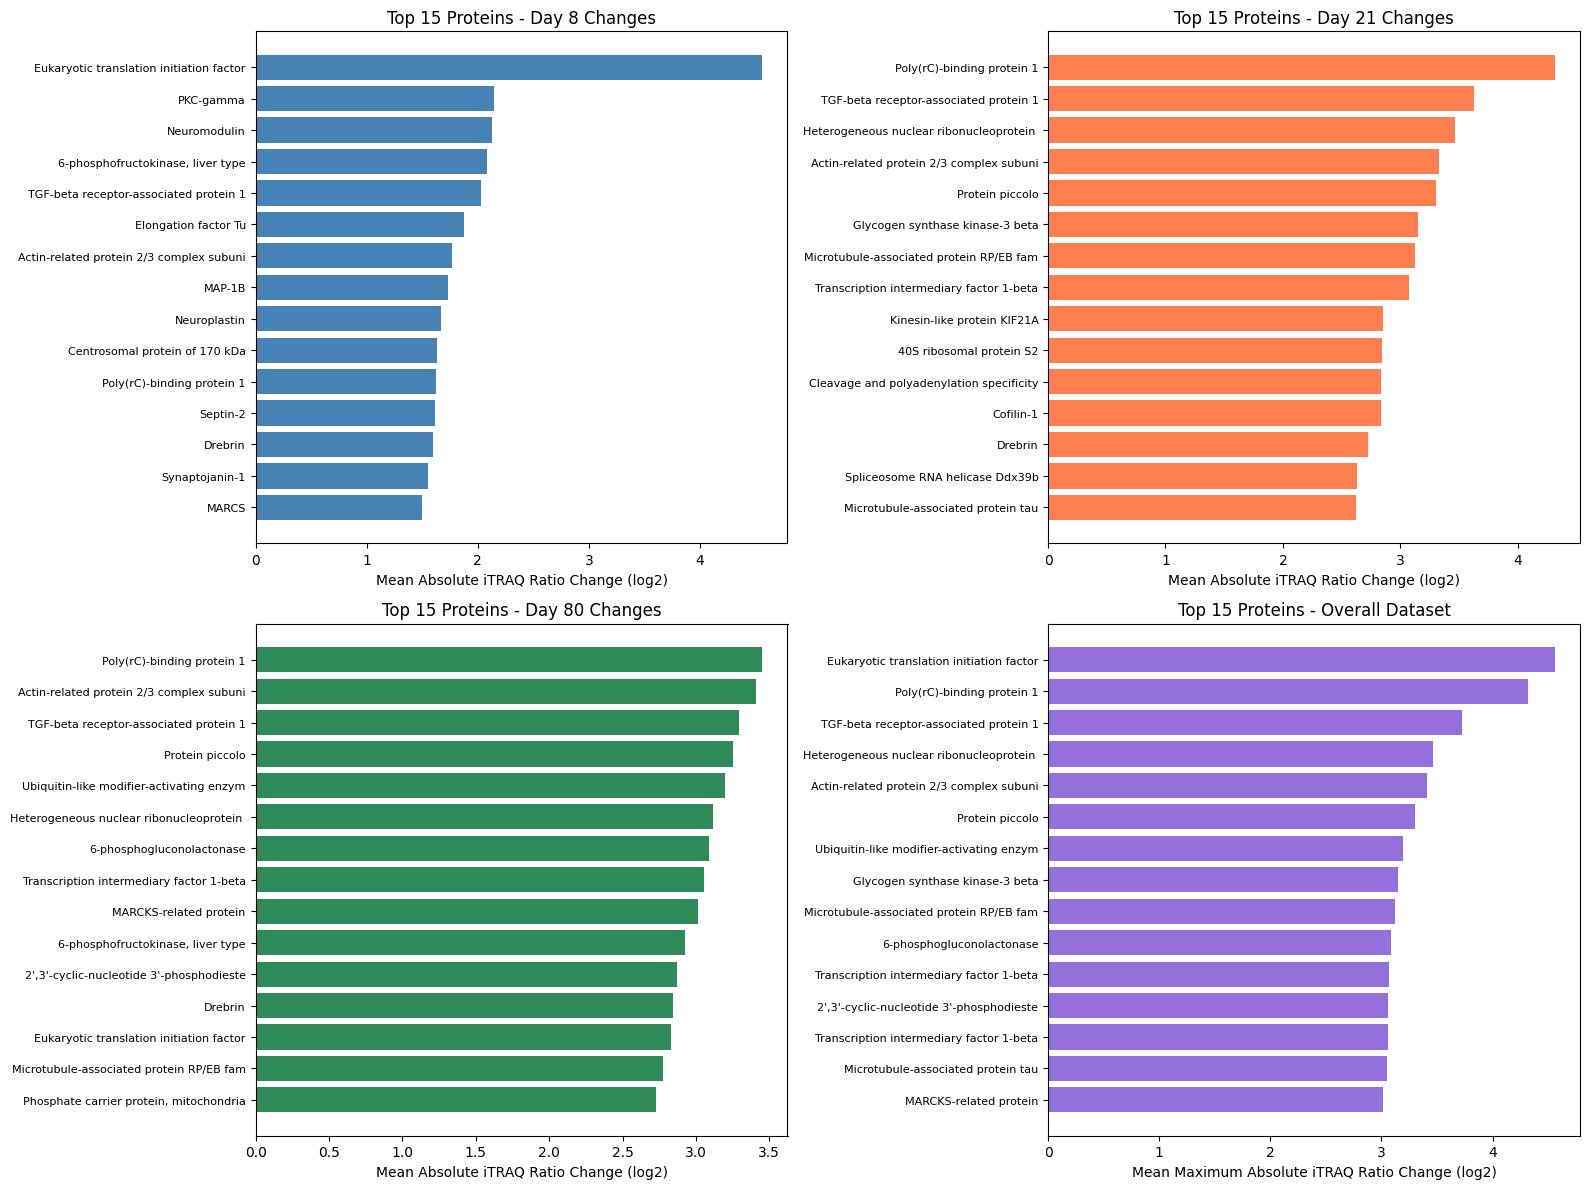


=== TOP PROTEINS BY TIMEPOINT ===

Day 8:
                                            Protein Name  AbsChange_D8
    Eukaryotic translation initiation factor 3 subunit 8      4.559200
                                               PKC-gamma      2.144820
                                            Neuromodulin      2.124175
                       6-phosphofructokinase, liver type      2.078630
                  TGF-beta receptor-associated protein 1      2.028196
                                    Elongation factor Tu      1.873700
Actin-related protein 2/3 complex subunit 5-like protein      1.763770
                                                  MAP-1B      1.729383
                                            Neuroplastin      1.672960
                          Centrosomal protein of 170 kDa      1.634090
                              Poly(rC)-binding protein 1      1.624280
                                                Septin-2      1.617160
                                  

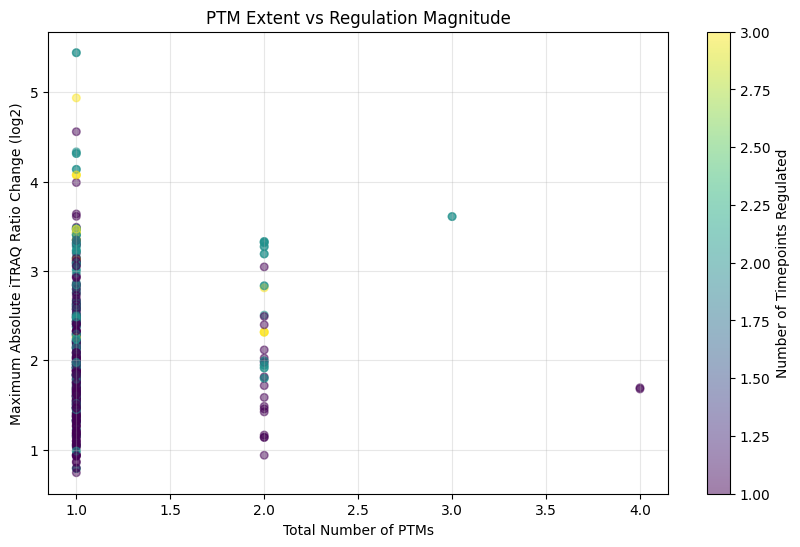

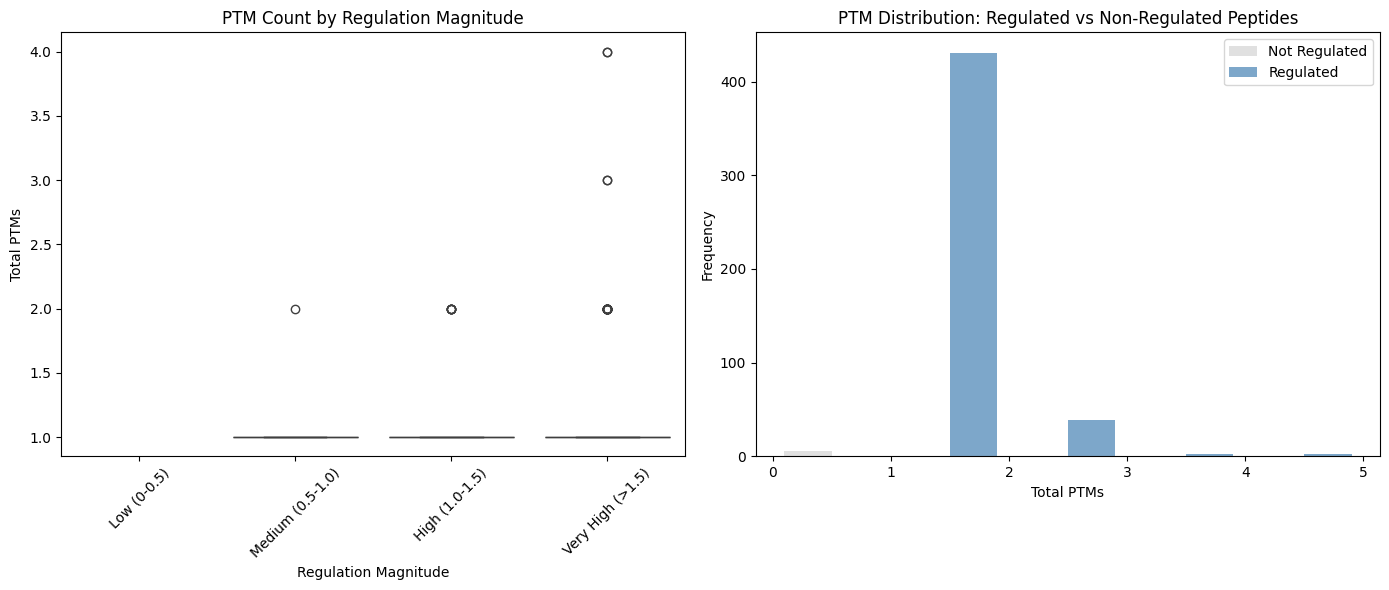

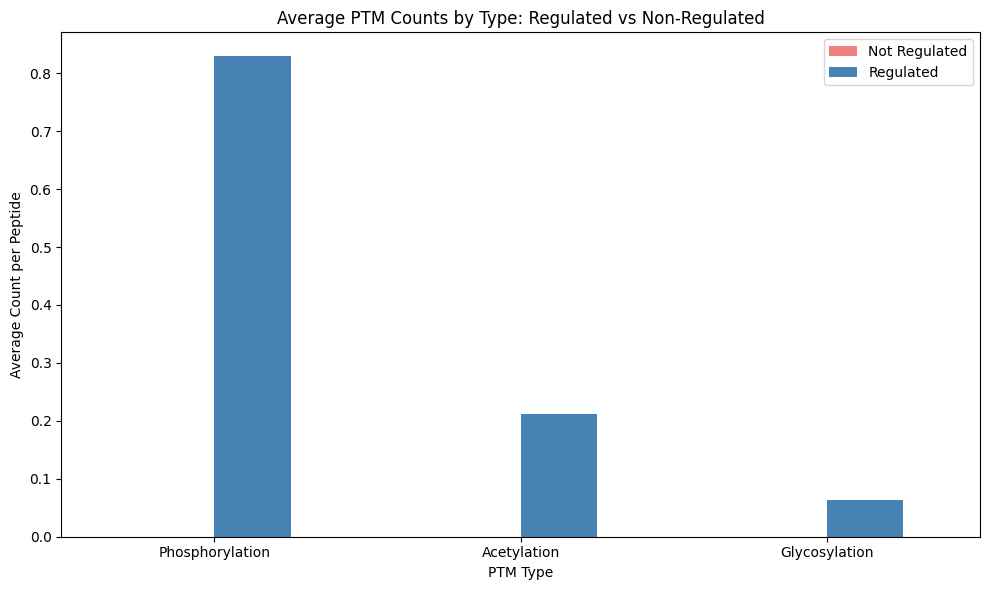


=== PTM ANALYSIS SUMMARY ===

Regulated peptides - Mean PTMs: 1.10
Non-regulated peptides - Mean PTMs: 0.00

Proportion of peptides regulated: 98.75%
Number of regulated peptides: 474
Number of non-regulated peptides: 6

=== Proteins with High PTM Density AND High Regulation ===
                                          Protein Name  Total_PTMs  \
24                  Microtubule-associated protein tau    1.500000   
54                              MARCKS-related protein    1.333333   
52   Pyruvate dehydrogenase E1 component subunit al...    1.125000   
37                                              MAP-1B    1.166667   
172              Serine/threonine-protein kinase DCLK1    1.300000   
38                                              MAP-1B    1.100000   
167                                       Neurobeachin    1.333333   
48                                               MAP 2    1.407407   
7                                           Neurabin-2    2.000000   
53                 

In [ ]:
## Code written with assistance from Claude for data visualization outputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read with correct header row
regulated_df = pd.read_excel(r'C:\Users\justi\Documents\Python Files\Regulated Peptides.xlsx', header=7)
peptide_df = pd.read_excel(r'C:\Users\justi\Documents\Python Files\Peptide Sequences.xlsx', header=7)

# Drop the first unnamed column
regulated_df = regulated_df.iloc[:, 1:]

print("Data loaded successfully!")
print(f"Number of peptides: {len(regulated_df)}")

# Convert Mean columns to numeric
mean_cols = ['Mean of log2 D0', 'Mean of log2 D8', 'Mean of log2 Day 21', 'Mean of log2 Day 80']
for col in mean_cols:
    regulated_df[col] = pd.to_numeric(regulated_df[col], errors='coerce')

# Convert PTM columns to numeric
ptm_cols = ['Phospho', 'Acetyl', 'Glyco (put.)']
for col in ptm_cols:
    regulated_df[col] = pd.to_numeric(regulated_df[col], errors='coerce')

# Convert regulation columns to boolean
reg_cols = ['D8 vs. D0', 'D21 vs. D0', 'D80 vs. D0']
for col in reg_cols:
    regulated_df[col] = regulated_df[col].astype(str).str.upper() == 'TRUE'

# Calculate changes from Day 0 for each timepoint
regulated_df['Change_D8'] = regulated_df['Mean of log2 D8'] - regulated_df['Mean of log2 D0']
regulated_df['Change_D21'] = regulated_df['Mean of log2 Day 21'] - regulated_df['Mean of log2 D0']
regulated_df['Change_D80'] = regulated_df['Mean of log2 Day 80'] - regulated_df['Mean of log2 D0']

# Calculate absolute changes
regulated_df['AbsChange_D8'] = abs(regulated_df['Change_D8'])
regulated_df['AbsChange_D21'] = abs(regulated_df['Change_D21'])
regulated_df['AbsChange_D80'] = abs(regulated_df['Change_D80'])
regulated_df['Max_AbsChange'] = regulated_df[['AbsChange_D8', 'AbsChange_D21', 'AbsChange_D80']].max(axis=1)

# Group by protein and calculate average changes
protein_changes = regulated_df.groupby('Protein ID').agg({
    'Protein Name': 'first',
    'AbsChange_D8': 'mean',
    'AbsChange_D21': 'mean',
    'AbsChange_D80': 'mean',
    'Max_AbsChange': 'mean'
}).reset_index()

# Get top 15 proteins for each timepoint
top_d8 = protein_changes.nlargest(15, 'AbsChange_D8')
top_d21 = protein_changes.nlargest(15, 'AbsChange_D21')
top_d80 = protein_changes.nlargest(15, 'AbsChange_D80')
top_overall = protein_changes.nlargest(15, 'Max_AbsChange')

# Visualization 1: Top proteins by timepoint
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Day 8
axes[0, 0].barh(range(len(top_d8)), top_d8['AbsChange_D8'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_d8)))
axes[0, 0].set_yticklabels([str(name)[:40] for name in top_d8['Protein Name']], fontsize=8)
axes[0, 0].set_xlabel('Mean Absolute iTRAQ Ratio Change (log2)')
axes[0, 0].set_title('Top 15 Proteins - Day 8 Changes')
axes[0, 0].invert_yaxis()

# Day 21
axes[0, 1].barh(range(len(top_d21)), top_d21['AbsChange_D21'], color='coral')
axes[0, 1].set_yticks(range(len(top_d21)))
axes[0, 1].set_yticklabels([str(name)[:40] for name in top_d21['Protein Name']], fontsize=8)
axes[0, 1].set_xlabel('Mean Absolute iTRAQ Ratio Change (log2)')
axes[0, 1].set_title('Top 15 Proteins - Day 21 Changes')
axes[0, 1].invert_yaxis()

# Day 80
axes[1, 0].barh(range(len(top_d80)), top_d80['AbsChange_D80'], color='seagreen')
axes[1, 0].set_yticks(range(len(top_d80)))
axes[1, 0].set_yticklabels([str(name)[:40] for name in top_d80['Protein Name']], fontsize=8)
axes[1, 0].set_xlabel('Mean Absolute iTRAQ Ratio Change (log2)')
axes[1, 0].set_title('Top 15 Proteins - Day 80 Changes')
axes[1, 0].invert_yaxis()

# Overall
axes[1, 1].barh(range(len(top_overall)), top_overall['Max_AbsChange'], color='mediumpurple')
axes[1, 1].set_yticks(range(len(top_overall)))
axes[1, 1].set_yticklabels([str(name)[:40] for name in top_overall['Protein Name']], fontsize=8)
axes[1, 1].set_xlabel('Mean Maximum Absolute iTRAQ Ratio Change (log2)')
axes[1, 1].set_title('Top 15 Proteins - Overall Dataset')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('question1_top_proteins.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print("\n=== TOP PROTEINS BY TIMEPOINT ===")
print("\nDay 8:")
print(top_d8[['Protein Name', 'AbsChange_D8']].to_string(index=False))
print("\nDay 21:")
print(top_d21[['Protein Name', 'AbsChange_D21']].to_string(index=False))
print("\nDay 80:")
print(top_d80[['Protein Name', 'AbsChange_D80']].to_string(index=False))
print("\nOverall:")
print(top_overall[['Protein Name', 'Max_AbsChange']].to_string(index=False))


# Count total PTMs per peptide
regulated_df['Total_PTMs'] = regulated_df[ptm_cols].sum(axis=1)

# Determine if peptide is regulated
regulated_df['Is_Regulated'] = regulated_df['D8 vs. D0'] | regulated_df['D21 vs. D0'] | regulated_df['D80 vs. D0']
regulated_df['Num_Timepoints_Regulated'] = regulated_df[['D8 vs. D0', 'D21 vs. D0', 'D80 vs. D0']].sum(axis=1)

# Calculate correlation
correlation = regulated_df['Total_PTMs'].corr(regulated_df['Max_AbsChange'])
print(f"\n\n=== CORRELATION ANALYSIS ===")
print(f"Correlation between Total PTMs and Maximum Change: {correlation:.3f}")

# Visualization 2a: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(regulated_df['Total_PTMs'], regulated_df['Max_AbsChange'], 
            alpha=0.5, s=30, c=regulated_df['Num_Timepoints_Regulated'], 
            cmap='viridis')
plt.colorbar(label='Number of Timepoints Regulated')
plt.xlabel('Total Number of PTMs')
plt.ylabel('Maximum Absolute iTRAQ Ratio Change (log2)')
plt.title('PTM Extent vs Regulation Magnitude')
plt.grid(alpha=0.3)
plt.savefig('question2_ptm_vs_regulation.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2b: Box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

regulated_df['Regulation_Category'] = pd.cut(regulated_df['Max_AbsChange'], 
                                              bins=[0, 0.5, 1.0, 1.5, np.inf],
                                              labels=['Low (0-0.5)', 'Medium (0.5-1.0)', 
                                                     'High (1.0-1.5)', 'Very High (>1.5)'])

sns.boxplot(data=regulated_df, x='Regulation_Category', y='Total_PTMs', ax=axes[0])
axes[0].set_xlabel('Regulation Magnitude')
axes[0].set_ylabel('Total PTMs')
axes[0].set_title('PTM Count by Regulation Magnitude')
axes[0].tick_params(axis='x', rotation=45)

regulated_only = regulated_df[regulated_df['Is_Regulated']]
not_regulated = regulated_df[~regulated_df['Is_Regulated']]

max_ptm = int(regulated_df['Total_PTMs'].max())
axes[1].hist([not_regulated['Total_PTMs'].dropna(), regulated_only['Total_PTMs'].dropna()], 
             bins=range(0, max_ptm + 2), 
             label=['Not Regulated', 'Regulated'], 
             alpha=0.7, color=['lightgray', 'steelblue'])
axes[1].set_xlabel('Total PTMs')
axes[1].set_ylabel('Frequency')
axes[1].set_title('PTM Distribution: Regulated vs Non-Regulated Peptides')
axes[1].legend()

plt.tight_layout()
plt.savefig('question2_ptm_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2c: PTM types
fig, ax = plt.subplots(figsize=(10, 6))
ptm_type_data = regulated_df.groupby('Is_Regulated')[ptm_cols].mean()
ptm_type_data.T.plot(kind='bar', ax=ax, color=['lightcoral', 'steelblue'])
ax.set_xlabel('PTM Type')
ax.set_ylabel('Average Count per Peptide')
ax.set_title('Average PTM Counts by Type: Regulated vs Non-Regulated')
ax.set_xticklabels(['Phosphorylation', 'Acetylation', 'Glycosylation'], rotation=0)
ax.legend(['Not Regulated', 'Regulated'])
plt.tight_layout()
plt.savefig('question2_ptm_types.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary
print("\n=== PTM ANALYSIS SUMMARY ===")
print(f"\nRegulated peptides - Mean PTMs: {regulated_only['Total_PTMs'].mean():.2f}")
print(f"Non-regulated peptides - Mean PTMs: {not_regulated['Total_PTMs'].mean():.2f}")
print(f"\nProportion of peptides regulated: {regulated_df['Is_Regulated'].mean():.2%}")
print(f"Number of regulated peptides: {len(regulated_only)}")
print(f"Number of non-regulated peptides: {len(not_regulated)}")

# Protein-level analysis
protein_ptm_analysis = regulated_df.groupby('Protein ID').agg({
    'Total_PTMs': 'mean',
    'Max_AbsChange': 'mean',
    'Is_Regulated': 'mean',
    'Protein Name': 'first'
}).reset_index()

protein_ptm_analysis.rename(columns={'Is_Regulated': 'Proportion_Regulated'}, inplace=True)

high_ptm_regulated = protein_ptm_analysis[
    (protein_ptm_analysis['Total_PTMs'] > protein_ptm_analysis['Total_PTMs'].quantile(0.75)) &
    (protein_ptm_analysis['Proportion_Regulated'] > 0.5)
].nlargest(20, 'Max_AbsChange')

print("\n=== Proteins with High PTM Density AND High Regulation ===")
print(high_ptm_regulated[['Protein Name', 'Total_PTMs', 'Max_AbsChange', 'Proportion_Regulated']])

print("\n=== Analysis Complete! ===")
print("Generated files:")
print("  - question1_top_proteins.png")
print("  - question2_ptm_vs_regulation.png")
print("  - question2_ptm_distribution.png")
print("  - question2_ptm_types.png")

1. Which proteins demonstrated the greatest changes in iTRAQ ratios over the course of 8 days? 21 days? 80 days? Over the entire dataset?

8 Days - Eukaryotic Translation Initiation Factor
21 Days - Poly(rC)-binding Protein 1
80 Days - Poly(rC)-binding Protein 1
Overall - Eukaryotic Translation Initiation Factor

These fluctuations in iTRAQ ratios help to provide insight regarding the relative changes in abundance of specific proteins during mouse brain development. When we examine specific timepoints, we can observe what different proteins undergo the most dramatic regulation at isolated developmental windows. For example, while eukaryotic translation initiation factor demonstrated the greatest change at day 8, it was not among the top 15 most-changed proteins at day 21. This suggests that translational control is particularly dynamic during early postnatal brain development (day 8), with the system potentially stabilizing by day 21. Interestingly, Poly(rC)-binding Protein 1, which is also involved in mRNA regulation and translation, showed the greatest changes at both day 21 and day 80, indicating ongoing but temporally distinct requirements for post-transcriptional regulation throughout brain maturation. When examining the entire dataset, the eukaryotic translation initiation factor demonstrated the greatest overall change in iTRAQ ratios across all developmental timepoints. This suggests that translational regulation represents one of the most heavily regulated processes during the entire span of early postnatal brain development. The protein's presence in the overall analysis, despite not being a top regulator at every individual timepoint, indicates that it undergoes substantial fluctuations across multiple developmental phases. This pattern is supported by the known importance of translational control in neuronal differentiation, synaptic plasticity, and the establishment of neural circuits during brain maturation.

2. Are extensive PTM modification (i.e. number of PTMs) and PTM regulation correlated? Do they appear to target the same areas of proteins?

When looking at the correlation between PTM modification and PTM regulation, we can focus on two aspects: degree of regulation and general linkage patterns. For instance, regulated peptides averaged 1.1 PTMs while non-regulated eppetides averaged 0.00 PTMs. This suggests that the presence of PTMs is strongly associated with regulation. At the same time, we can look at the correlation coefficient for total PTMs and maximum change (in regulation magnitude); this is calculated to be 0.055. This is an extremely low r-value which suggests that extensive PTm modification and the degree of regulation are not strongly linearly correlated. Therefore, we can only conclude that the presence of PTMs is associated with regulation, but having more PTMs does NOT necessarily result in greater magnitude of change.

It appears that PTMs and regulation converge on functionally related protein gropus. The proteins demonstrating both high PTM density and high regulation are typically enriched in cytoskeletal proteins (MAP-1B, MAP-2, microtubule-associated protein tau, and neurofilament heavy polypeptide), signaling proteins (MARCKS and MARCKS-related protein), and synaptic proteins (glutamate receptor 2, neurobecahin, and neurabin-2). These proteins share common functional theems that are important for brain development such as neuronal structure, process outgrowht, and synaptic organization. This co-localization of both PTMs and regulation in growth-associated proteins suggests that post-translational modificaitions serve as a key regulatory mechanisms for controlling the development of neuronal architecture during brain maturation. This analysis is in line with the study's conclusion that PTM regulation displays coordinated patterns across multiple modification types, specifically targeting proteins involved in neuronal process structure and growth.

References:
Anthropic. (2024). Claude (Sonnet 4.5) [Large language model]. https://claude.ai/chat/

Edwards, A. V., Schwämmle, V., & Larsen, M. R. (2014). Neuronal process structure and growth proteins are targets of heavy PTM regulation during brain development. Journal of Proteomics, 101, 77-87. 
